In [1]:
%matplotlib inline

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import argparse

Read an image

(512, 512, 3)


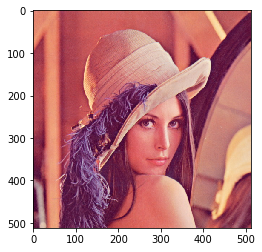

In [3]:
img = cv2.imread('data/lena.jpg', cv2.IMREAD_ANYCOLOR)
imgArray = np.array(img)
if img.ndim < 3:
    plt.imshow(img, cmap = plt.cm.gray)
    plt.show()
else:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

Image was read in BGR format, so we need to convert it to RGB

Converts an openCV matrix to a NumPy array

In [4]:
def showImg(img, title, waitValue, callback = None):
    cv2.namedWindow(title)
    if callback != None:
        cv2.setMouseCallback('Original Image', onMouseClick)
    cv2.imshow(title, img)
    cv2.waitKey(waitValue)
    cv2.destroyWindow(title)

In [5]:
pos = []
def onMouseClick(event, x, y, flags, param):
    global posList
    if event == cv2.EVENT_LBUTTONDOWN:
        pos.clear()
        pos.append((y, x))
        calcEucDist(img) if img.ndim == 3 else calcAbsDist()
    

In [6]:
def calcAbsDist():
    idx = (img - imgArray[pos[0][0], pos[0][1], 0:img.ndim])
    idx = (idx > 13)
    redArray = (img < imgArray[pos[0][0], pos[0][1], 0:img.ndim]) * 255
    result = img * idx  + redArray
    plt.imshow(result, cmap = plt.cm.gray)

In [7]:
def calcEucDist(img):
    dist = np.ones((512,512,3)) * img
    dist = dist[:,:,:dist.ndim] - dist[pos[0][0], pos[0][1], :dist.ndim]
    dist = np.power(dist, 2)
    dist = np.sqrt(dist[:,:,0] + dist[:,:,1] + dist[:,:,2])
    redArray = (dist < 13) * 255
    img = img * (dist > 13)[..., None]
    img[:,:,2] += np.uint8(redArray)
    showImg(img, 'Colored Image', 5000)
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     plt.show()

In [8]:
showImg(img, 'Original Image', 0, onMouseClick)

Creates new dist array

In [9]:
dist = np.ones((512,512,3)) * img
print(dist[pos[0][0], pos[0][1], :dist.ndim])
# print(dist[:1, :1, :dist.ndim]);
print('ORIGINAL\n', img[:2, :2, :dist.ndim]);

[ 56.  26. 109.]
ORIGINAL
 [[[128 138 225]
  [127 137 224]]

 [[127 137 224]
  [127 137 224]]]


Calculates the differences

In [10]:
dist = dist[:,:,:dist.ndim] - dist[pos[0][0], pos[0][1], :dist.ndim]
print('DIFF\n', dist[:2,:2,:dist.ndim])

DIFF
 [[[ 72. 112. 116.]
  [ 71. 111. 115.]]

 [[ 71. 111. 115.]
  [ 71. 111. 115.]]]


Calculates the differences power, sum and sqrt

In [11]:
dist = np.power(dist, 2)
print('DIFF POWER\n', dist[:2,:2,:dist.ndim])
dist = np.sqrt(dist[:,:,0] + dist[:,:,1] + dist[:,:,2])
print('SUM SQRT\n', dist[:2,:2])

DIFF POWER
 [[[ 5184. 12544. 13456.]
  [ 5041. 12321. 13225.]]

 [[ 5041. 12321. 13225.]
  [ 5041. 12321. 13225.]]]
SUM SQRT
 [[176.58992044 174.89139487]
 [174.89139487 174.89139487]]


Creates array with trues when distance is less than 13

In [12]:
redArray = (dist < 13) * 255
print('RED ARRAY\n', redArray[:2,:2])

RED ARRAY
 [[0 0]
 [0 0]]


Zeroes image where distance is less than 13

In [13]:
img = img * (dist > 13)[..., None]
print('IMG ZEROED\n', img[:2,:2])

IMG ZEROED
 [[[128 138 225]
  [127 137 224]]

 [[127 137 224]
  [127 137 224]]]


Colors image with red by summing in the red channel the red array calculated previously

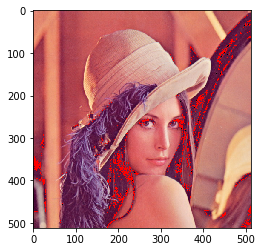

In [15]:
img[:,:,2] += np.uint8(redArray)
showImg(img, 'Colored Image', 5000)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()